# Simulando pesquisas eleitorais com Python

### Esse código é o complemento do meu post sobre pesquisas eleitorais, ele pode ser lido [aqui](https://www.itsjohnsnotes.com/single-post/2018/10/27/Pesquisas-Eleitorais-Só-Precisam-de-2000-Pessoas-Pra-Acertar-Uma-Prova-Com-Programação)

In [4]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Primeiro, definimos o tamanho do eleitorado e o número de votos para os quais vamos simular e definimos a função 'pesquisa'

In [2]:
def pesquisa(eleitorado, votacao, amostra):
    resultado = 0
    for i in range(amostra):
        chave = random.randint(0,eleitorado)
        if chave < votacao:
            resultado += 1
        else:
            resultado += 0
    return (resultado/amostra) * eleitorado

## Agora vamos simular uma pesquisa:

In [77]:
eleitorado = 150000000
votacao = 60000000
amostra = 2000
resultado_pesquisa = pesquisa(eleitorado, votacao, amostra)
erro = abs(((resultado_pesquisa)/votacao - 1) * 100)

print("resultado: {}, erro:{}".format(resultado_pesquisa, erro))

resultado: 58950000.0, erro:1.749999999999996


## Depois, definimos o número de simulações de pesquisa que queremos executar e definimos a função 'Simulacao'

### Essa função retorna o resultado médio e o erro médio depois de realizadas 'simulacoes' pesquisas.

In [82]:
def simulacao(simulacoes, amostra):
    soma_resultado = 0
    soma_erro = 0
    for i in range(simulacoes):
        resultado = pesquisa(eleitorado, votacao, amostra)
        soma_resultado += resultado
        soma_erro += abs(((resultado)/votacao - 1) * 100)
    erro_medio = soma_erro / simulacoes
    resultado_medio = soma_resultado/ simulacoes
    return erro_medio

## Agora vamos visualizar a diferença do erro médio para tamanhos diferentes de amostra

### O código abaixo faz 150 simulações em diferentes tamanhos de amostra. A amostra varia de 10 em 10, partindo de 10 a 1500. No total, são feitas 150.000 'pesquisas'.

In [83]:
valores_amostra = []
resultado_medio = []
erro_medio = []
for i in range(1,451):
    erro_medio.append(0)
    valores_amostra.append(i*10)
for i in range(0,450):
    erro_medio[i] = simulacao(1000, valores_amostra[i])
print("Finalizado")

Finalizado


## Vizualizando a variação do erro quando se varia as amostras.

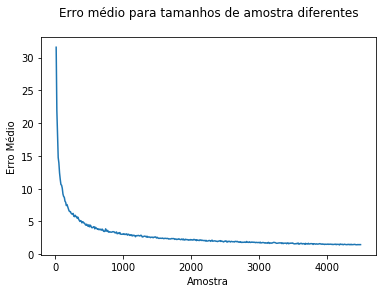

In [84]:
plt.xlabel("Amostra")
plt.ylabel("Erro Médio")
plt.title("Erro médio para tamanhos de amostra diferentes\n")
plt.plot(valores_amostra, erro_medio)
plt.show()

## Podemos concluir, então, que o erro não excede 4.06 pontos percentuais para amostras menores que 4500.

#### Código elaborado por João Pedro Oliveira. 2018